In [15]:
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))

In [1]:
# load full list of results sc stages (iPS, mesendo, defendo)
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [2]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [3]:
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 0.1,]
nrow(leads.ips.sign)

[1] 1833

In [4]:
leads.mes.sign = leads.mes[leads.mes$global_corr_p_value < 0.1,]
nrow(leads.mes.sign)

[1] 1702

In [5]:
leads.defendo.sign = leads.defendo[leads.defendo$global_corr_p_value < 0.1,]
nrow(leads.defendo.sign)

[1] 1342

In [6]:
RankAndKeepTop <- function(leads){
    leads1 = leads[order(leads$global_corr_p_value),]
    leads2 = leads1[-which(duplicated(leads1$feature)),]  
    leads2
}

In [9]:
### inner join significant sc iPS leads, all results from sc mesendo leads
leads.ips.in.me = left_join(leads.ips.sign, res.mes, by = c("snp_id","feature"), 
                            suffix = c(".ips",".me"))
# nrow(leads.ips.in.me)
leads.ips.in.me = RankAndKeepTop(leads.ips.in.me)
# nrow(leads.ips.in.me)
### inner join significant sc iPS leads and mesenso, all results from sc defendo leads
leads.ips.in.me.in.de = left_join(leads.ips.in.me, res.defendo, by = c("snp_id","feature","ensembl_gene_id"))
# colnames(leads.ips.in.me.in.de)
# nrow(leads.ips.in.me.in.de)
leads.ips.in.me.in.de = RankAndKeepTop(leads.ips.in.me.in.de)
# nrow(leads.ips.in.me.in.de)
ips = leads.ips.in.me.in.de
ips$p_value.de = ips$p_value
ips$beta.de = ips$beta
ips = ips[!(is.na(ips$p_value.me)) & !(is.na(ips$p_value.de)),]
nrow(ips[(ips$p_value.me >= 0.05) & (ips$p_value.de >= 0.05),])
nrow(ips[((ips$p_value.me >= 0.05) & (ips$p_value.de < 0.05)),])
nrow(ips[((ips$p_value.de >= 0.05) & (ips$p_value.me < 0.05)),])
nrow(ips[((ips$p_value.me >= 0.05) & (ips$p_value.de < 0.05)) | ((ips$p_value.me < 0.05) & (ips$p_value.de >= 0.05)),])
nrow(ips[(ips$p_value.me < 0.05) & (ips$p_value.de < 0.05),])

[1] 468

[1] 182

[1] 287

[1] 469

[1] 681

In [10]:
### inner join significant sc mesendo leads, all results from sc iPSC leads
leads.me.in.ips = left_join(leads.mes.sign, res.ips, by = c("snp_id","feature"), 
                            suffix = c(".me",".ips"))
# nrow(leads.me.in.ips)
leads.me.in.ips = RankAndKeepTop(leads.me.in.ips)
nrow(leads.me.in.ips)
# ### inner join significant sc mesendo leads and iPS, all results from sc defendo leads
leads.me.in.ips.in.de = left_join(leads.me.in.ips, res.defendo, by = c("snp_id","feature","ensembl_gene_id"))
# # nrow(leads.me.in.ips.in.de)
leads.me.in.ips.in.de = RankAndKeepTop(leads.me.in.ips.in.de)
# # nrow(leads.me.in.ips.in.de)
mesendo = leads.me.in.ips.in.de
mesendo$p_value.de = mesendo$p_value
mesendo$beta.de = mesendo$beta
mesendo = mesendo[!(is.na(mesendo$p_value.ips)) & !(is.na(mesendo$p_value.de)),]
nrow(mesendo[(mesendo$p_value.ips >= 0.05) & (mesendo$p_value.de >= 0.05),])
nrow(mesendo[((mesendo$p_value.ips >= 0.05) & (mesendo$p_value.de < 0.05)),])
nrow(mesendo[((mesendo$p_value.de >= 0.05) & (mesendo$p_value.ips < 0.05)),])
nrow(mesendo[((mesendo$p_value.ips >= 0.05) & (mesendo$p_value.de < 0.05)) | ((mesendo$p_value.ips < 0.05) & (mesendo$p_value.de >= 0.05)),])
nrow(mesendo[(mesendo$p_value.ips < 0.05) & (mesendo$p_value.de < 0.05),])

[1] 1679

[1] 455

[1] 100

[1] 278

[1] 378

[1] 592

In [11]:
### inner join significant sc defendo leads, all results from sc iPSC leads
leads.de.in.ips = left_join(leads.defendo.sign, res.ips, by = c("snp_id","feature"), 
                            suffix = c(".de",".ips"))
# nrow(leads.de.in.ips)
leads.de.in.ips = RankAndKeepTop(leads.de.in.ips)
nrow(leads.de.in.ips)
# ### inner join significant sc defendo leads and iPS, all results from sc mesendo leads
leads.de.in.ips.in.me = left_join(leads.de.in.ips, res.mes, by = c("snp_id","feature","ensembl_gene_id"))
# # nrow(leads.de.in.ips.in.me)
leads.de.in.ips.in.me = RankAndKeepTop(leads.de.in.ips.in.me)
# # nrow(leads.de.in.ips.in.me)
defendo = leads.de.in.ips.in.me
defendo$p_value.me = defendo$p_value
defendo$beta.me = defendo$beta
defendo = defendo[!(is.na(defendo$p_value.ips)) & !(is.na(defendo$p_value.me)),]
nrow(defendo[(defendo$p_value.ips >= 0.05) & (defendo$p_value.me >= 0.05),])
nrow(defendo[((defendo$p_value.ips >= 0.05) & (defendo$p_value.me < 0.05)),])
nrow(defendo[((defendo$p_value.me >= 0.05) & (defendo$p_value.ips < 0.05)),])
nrow(defendo[((defendo$p_value.ips >= 0.05) & (defendo$p_value.me < 0.05)) | ((defendo$p_value.ips < 0.05) & (defendo$p_value.me >= 0.05)),])
nrow(defendo[(defendo$p_value.ips < 0.05) & (defendo$p_value.me < 0.05),])

[1] 1322

[1] 435

[1] 115

[1] 138

[1] 253

[1] 590

In [44]:
col_day0 = canva_pal("Pool party")(4)[1]
col_day1 = canva_pal("Pool party")(4)[2]
col_day2 = canva_pal("Pool party")(4)[3]
col_day3 = canva_pal("Pool party")(4)[4]

col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

# col_ips = canva_pal("Vintage charm")(4)[1]
# col_mesendo = canva_pal("Vintage charm")(4)[4]
# col_defendo = canva_pal("Vintage charm")(4)[2]

# col_ips = canva_pal("Pastels")(4)[1]
# col_mesendo = canva_pal("Pastels")(4)[4]
# col_defendo = canva_pal("Pastels")(4)[2]

# col_ips = "cornflowerblue"
# col_mesendo = "forestgreen"
# col_defendo = "coral"

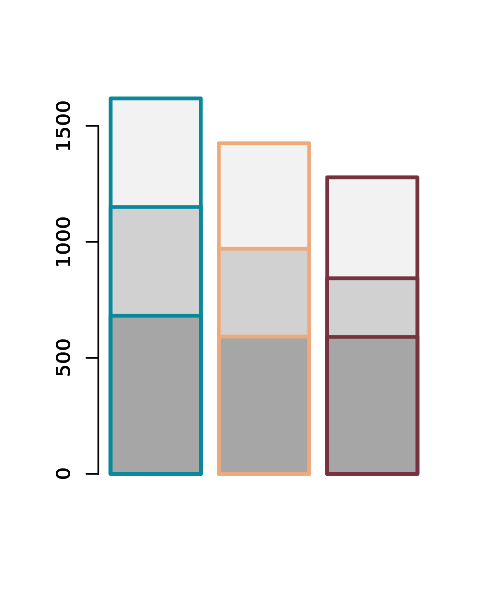

In [45]:
options(repr.plot.width = 4, repr.plot.height = 5)
opar <- par(lwd = 3)
barplot(c(1618,1425,1278), col = "gray95", border = c(col_ips, col_mesendo, col_defendo), axes = 3)
barplot(c(1150,970,843), col = "gray82", border = c(col_ips, col_mesendo, col_defendo), add = T)
barplot(c(681,592,590), col = "gray65", border = c(col_ips, col_mesendo, col_defendo), add = T)